# Lab 3 Vision par ordinateur : Apprentissage profond

Author: Mohsen Benlazreg M.ing en GPA

Mise à jour: Étienne Pepin

REF : https://keras.io/examples/
#### requirements :
numpy  
sklearn  
tensorflow

# Partie 1 : Introduction au réseau de neurones

Dans cette partie nous commencerons par un premier exemple concret d'un réseau de neurones, qui utilise la bibliothèque Keras pour apprendre à classifier les chiffres manuscrits. Le problème que nous essayons de résoudre ici est de classer les images en niveaux de gris de chiffres manuscrits (28 pixels par 28 pixels), dans leur 10 catégories (0 à 9).
La base de bonnées que nous utiliserons est MNIST, elle est trés populaire dans la communauté d'apprentissage profond et contient 60 000 images d'entraînement, plus 10 000 d'images de test.
Vous pouvez penser à «résoudre» le MNIST comme le «Hello World» de l'apprentissage profond.

In [1]:
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="1"  #disables GPU 
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.python.client import device_lib
#tf.disable_v2_behavior()

#print(device_lib.list_local_devices())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

print(tf.__version__ )

Num GPUs Available:  1
2.9.1


La base de données MNIST est offerte par Keras sous forme d'un ensemble de vecteur numpy. 

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

`train_images` et `train_labels` forment la base d'apprentissage, ce sont les données que notre modèle va apprendre. Le modèle sera ensuite testé sur `test_images` en donnant les vrais labels `test_labels` pour calculer sa précision. Nos images sont codées sous forme de tableaux Numpy, et les étiquettes sont simplement un tableau de chiffres, allant de 0 à 9.

Jetons un coup d'œil aux données d'entraînement:

In [5]:
print(train_images.shape)
print(len(train_labels))

(60000, 28, 28)
60000


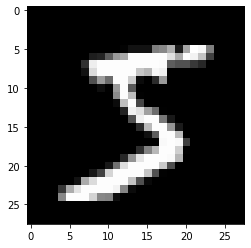

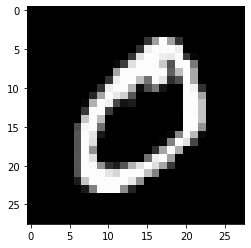

In [7]:
plt.imshow(train_images[0],cmap='gray');
plt.show();
plt.imshow(train_images[1],cmap='gray');

In [8]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Jetons un coup d'œil aux données de test:

In [9]:
print(test_images.shape)
print(len(test_labels))

(10000, 28, 28)
10000


La démarche à suivre est la suivante : nous construirons d'abord notre réseau de neurones avec les données d'entraînement, `train_images` et `train_labels`. Le réseau apprendra ensuite à associer des images et des étiquettes. Enfin, nous demanderons au réseau de produire des prédictions pour `test_images`, et nous vérifierons si ces prédictions correspondent aux étiquettes de `test_labels`.

On commence par construire notre réseau de neurone :

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28* 28,)))
network.add(layers.Dense(10, activation='softmax'))

Ici, notre réseau se compose d'une séquence de deux couches `dense`, qui sont des couches neuronales entièrement connectées (également appelées «fully-connected»). La deuxième (et dernière) couche est une couche "softmax" à 10 sorties, ce qui signifie qu'elle renverra un tableau de 10 scores de probabilité. Chaque score correspondra à la probabilité que l'image numérique actuelle appartienne à l'une de nos classes à 10 chiffres.

Pour préparer notre réseau, nous devons choisir trois autres choses, dans le cadre de l'étape de "compilation":

`Une fonction de perte`: c'est avec cette fonction que le réseau pourra mesurer la qualité d'un travail sur ses données d'entrainement, et donc comment il pourra s'orienter dans la bonne direction.

`Un optimiseur`: c'est le mécanisme par lequel le réseau se mettra à jour en fonction des données qu'il voit et de sa fonction de perte.

`Mesures à surveiller pendant l'entrainement et les tests`. Ici, nous nous intéresserons que de la précision.

In [11]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Avant l'entrainement, nous allons prétraiter nos données en la forme attendue par le réseau et en les mettant à l'échelle de sorte que toutes les valeurs soient à l'intervalle `[0, 1]`.

In [12]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_images=train_images.reshape((train_images.shape[0],28*28))
test_images=test_images.reshape((test_images.shape[0],28*28))

Nous devons également changer le type des étiquettes en `categorical`

In [13]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [14]:
print(train_images.shape)

(60000, 784)


Maintenant nous sommes prêts à faire l'entrainement :

In [15]:
network.fit(train_images, train_labels, epochs=4, batch_size=128)

Epoch 1/4
469/469 [==============================] - 3s 3ms/step - loss: 0.2554 - accuracy: 0.9257
Epoch 2/4
469/469 [==============================] - 1s 3ms/step - loss: 0.1029 - accuracy: 0.9692
Epoch 3/4
469/469 [==============================] - 1s 3ms/step - loss: 0.0675 - accuracy: 0.9795
Epoch 4/4
469/469 [==============================] - 1s 3ms/step - loss: 0.0499 - accuracy: 0.9850


On check maintenant la performance de notre model dans la base de test :


In [16]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0702 - accuracy: 0.9797


In [17]:
print('test_acc:', test_acc)

test_acc: 0.9797000288963318


# Exercice 1:

1-Ajouter 1 ou 2 couches cachées au réseau de neurones utilisé et decrire comment ça affecte la précision.

2-Essayer de modifier le nombre de neurones pour chaque couche. 


In [21]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28* 28,)))

network.add(layers.Dense(340, activation='relu' ))
network.add(layers.Dense(225, activation='relu' ))

network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network.fit(train_images, train_labels, epochs=4, batch_size=128)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/4
469/469 [==============================] - 2s 3ms/step - loss: 0.2183 - accuracy: 0.9348
Epoch 2/4
469/469 [==============================] - 1s 3ms/step - loss: 0.0842 - accuracy: 0.9740
Epoch 3/4
469/469 [==============================] - 1s 3ms/step - loss: 0.0549 - accuracy: 0.9823
Epoch 4/4
313/313 [==============================] - 1s 2ms/step - loss: 0.0791 - accuracy: 0.9758
test_acc: 0.9757999777793884


Pour cette étape, nous avons testé la performance du reseau de neurones en fonction du nombre de couches cachées ainsi que le nombre de neurones par couches cachées. 

Premierement, nous avons ajouté une, ensuite deux couches cachées de taille 512 (identique à la couche d'entree). Avec une couche cachée, nous remarquons une perte de performance, mais avec deux couche cachées, la performance est superieur. 

Ensuite, nous avons varié le nombre de neurones des couches cachées. D'après [une recherche rapide](https://www.researchgate.net/post/How-to-decide-the-number-of-hidden-layers-and-nodes-in-a-hidden-layer/5a5db4ee48954c2610357754/citation/download. ), nous avons appris que une regle de pouce c'est que la taille d'une couche cachée devrait etre à peu près 2/3 de la couche precedante. En appliquant cette regle, le modèle à 2 couches cachees nous donne la meilleure performance.

![Peformance des couches cachées](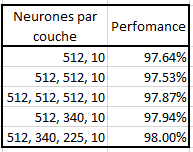
)

3-Essayer la fonction d'activation `tanh` au lieu de `relu`.

Si on garde la meilleur configuration de la question 2 (c'est a dire 340 et 225 neurones au cc), et on utilise `tanh`, on voit une petite perte en performance (97.43 %)

4-Modifier l'optimiseur `rmsprop` par `sgd` et/ou `adam`

Pour cette question, on va reprendre le meilleur modele de la question 2 avec la fonction d'activation `relu`.

Voici les performances pour chaque optimiseurs:
- `rmsprop` : 98%
- `sgd` : 92 %
- `adam` : 98%



# Partie 2 : Introduction au Réseau de neurones convolutifs

Dans cette partie on va créer un reseau de neurones convolutifs pour resoudre le problème de classfication des chiffres manuscrits de la base de données MNIST. 

Les 6 lignes ci-dessous montrent l'architecture basique d'un CNN.

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))



On remarque que la couche de convolution reçoit comme entrée un tenseur de forme `(image_height, image_width, image_channels)`. Dans notre cas, nos images sont en niveau de gris donc `image_channels=1`. 

Affichons l'architecture de notre CNN :

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


maintenant on doit ajouter notre classificateur qui est un reseau de neurones entièrement connectées 

In [5]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

Comme vous pouvez remarquer, la couche de "flatten" est entre la partie d'extraction de caracteristiques et la partie de classfication. Il s'agit de rendre le tenseur 3D en tenseur 1D.  

Prétraitement de données :

In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Commencer l'entrainement:

In [7]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history =model.fit(train_images, train_labels, epochs=4, batch_size=64)

Epoch 1/4
938/938 [==============================] - 11s 5ms/step - loss: 0.1747 - accuracy: 0.9441
Epoch 2/4
938/938 [==============================] - 5s 5ms/step - loss: 0.0453 - accuracy: 0.9861
Epoch 3/4
938/938 [==============================] - 5s 5ms/step - loss: 0.0307 - accuracy: 0.9904
Epoch 4/4
938/938 [==============================] - 5s 5ms/step - loss: 0.0226 - accuracy: 0.9929


Visualisation des courbes de précision et erreur lors de l'entrainement:

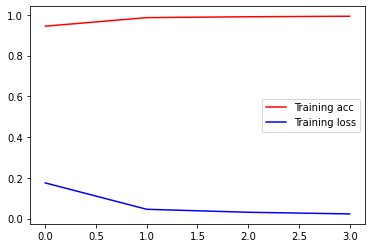

In [9]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.legend()
plt.show()


Évaluation du model dans la base de test:
    

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0249 - accuracy: 0.9920
test_acc 0.9919999837875366


# Exercice 2:

Modifier les hyper-paramétres de CNN et commenter les résultats. 



In [12]:
#https://www.tensorflow.org/tensorboard/hyperparameter_tuning_with_hparams

from tensorboard.plugins.hparams import api as hp
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD

HP_NUM_DENSE_UNITS = hp.HParam('num_dense_units', hp.Discrete([16, 64, 128]))
HP_NUM_EPOCHS = hp.HParam('num_epochs', hp.Discrete([2, 4, 6]))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['RMSprop', 'adam', 'sgd']))
HP_LEARNING_RATE = hp.HParam('learning_rate', hp.Discrete([1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]))  
#HP_KERNAL_SIZE = hp.HParam('kernal_size', hp.Discrete([3, 5]))
#HP_NUM_LAYERS = hp.HParam('num_layers', hp.Discrete([1,2,3,4,5]))
METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_NUM_DENSE_UNITS, HP_NUM_EPOCHS, HP_OPTIMIZER,  HP_LEARNING_RATE], #HP_NUM_LAYERS],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

def train_test(hparams):

  model = models.Sequential()
  model.add(layers.Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)))

  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, 3, activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, 3, activation='relu'))

  model.add(layers.Flatten())
  model.add(layers.Dense(hparams[HP_NUM_DENSE_UNITS], activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  
  optimizer = hparams[HP_OPTIMIZER]
  learning_rate = hparams[HP_LEARNING_RATE]
  if optimizer == "adam":
      optimizer = Adam(learning_rate=learning_rate)
  elif optimizer == "sgd":
      optimizer = SGD(learning_rate=learning_rate)
  elif optimizer=='RMSprop':
      optimizer = RMSprop(learning_rate=learning_rate)

  model.compile(optimizer = optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
              
  model.fit(train_images, train_labels, epochs=hparams[HP_NUM_EPOCHS], batch_size=64)
  test_loss, test_acc = model.evaluate(test_images, test_labels)
  return test_acc

def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

session_num = 0

for num_units in HP_NUM_DENSE_UNITS.domain.values:
  for optimizer in HP_OPTIMIZER.domain.values:
    for learning_rate in HP_LEARNING_RATE.domain.values:
      for epochs in HP_NUM_EPOCHS.domain.values:
        #for num_layers in HP_NUM_LAYERS.domain.values:

        hparams = {
                HP_NUM_DENSE_UNITS: num_units,
                HP_NUM_EPOCHS: epochs,
                HP_OPTIMIZER: optimizer,
                HP_LEARNING_RATE: learning_rate,
                #HP_NUM_LAYERS: num_layers
                #HP_KERNAL_SIZE: k_size
        }
        run_name = "run-%d" % session_num
        print('--- Starting trial: %s' % run_name)
        print({h.name: hparams[h] for h in hparams})
        run('logs/hparam_tuning/' + run_name, hparams)
        session_num += 1    

--- Starting trial: run-0
{'num_dense_units': 16, 'num_epochs': 2, 'optimizer': 'RMSprop', 'learning_rate': 1e-07}
Epoch 1/2
938/938 [==============================] - 6s 6ms/step - loss: 2.3022 - accuracy: 0.0996
Epoch 2/2
313/313 [==============================] - 1s 2ms/step - loss: 2.3001 - accuracy: 0.1051
--- Starting trial: run-1
{'num_dense_units': 16, 'num_epochs': 4, 'optimizer': 'RMSprop', 'learning_rate': 1e-07}
Epoch 1/4
938/938 [==============================] - 5s 5ms/step - loss: 2.3019 - accuracy: 0.1229
Epoch 2/4
938/938 [==============================] - 5s 5ms/step - loss: 2.3005 - accuracy: 0.1305
Epoch 3/4
938/938 [==============================] - 5s 5ms/step - loss: 2.2993 - accuracy: 0.1375
Epoch 4/4
313/313 [==============================] - 1s 2ms/step - loss: 2.2972 - accuracy: 0.1549
--- Starting trial: run-2
{'num_dense_units': 16, 'num_epochs': 6, 'optimizer': 'RMSprop', 'learning_rate': 1e-07}
Epoch 1/6
938/938 [==============================] - 5s 6ms/s

 Pour faire cette étape, on s'est basé sur le [tutoriel de Tensorflow](https://www.tensorflow.org/tensorboard/hyperparameter_tuning_with_hparams) pour ajuster les hyperparametres et visualizer les performaces avec Tensorboards. Ceci nous a permis de tester le model avec chaque permutations de hyperparamtres. Nous avons décider de varier les hyperparametres suivants:

 - Le nombre de neurones dans la couche du reseau de neurones entièrement connectées [16, 64, 128]
 - Le nombre d'époches [2, 4, 6]
 - L'optimiseur [sgd, adam, RMSProp]
 - Le taux d'apprentissage [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

 La figure ci dessous montre la performance du model pour chaque permutation des hyperparametres. Les meilleur hyperparametres sont representés par la courbe verte.



![](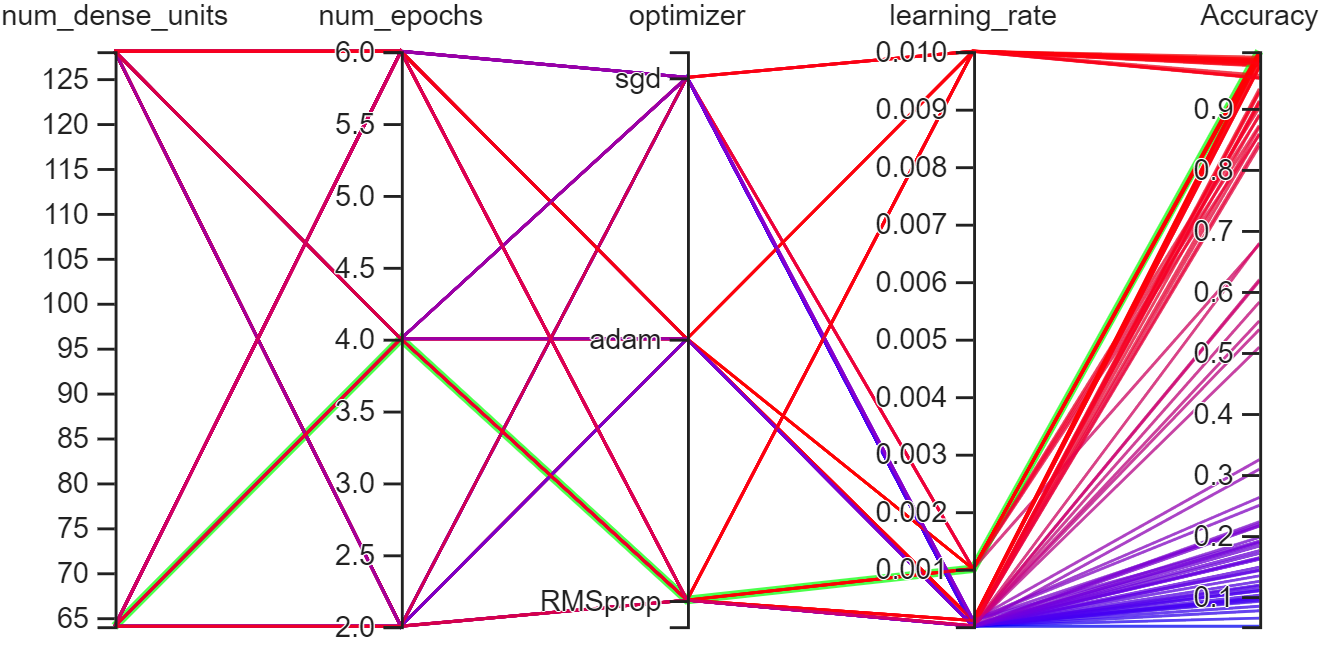
)

Les deux prochaines figures montre les meilleur et ensuite les pires hyperparamtres.

![](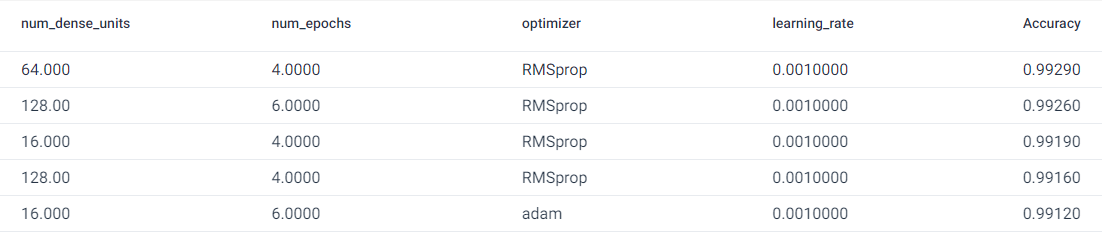
)

![](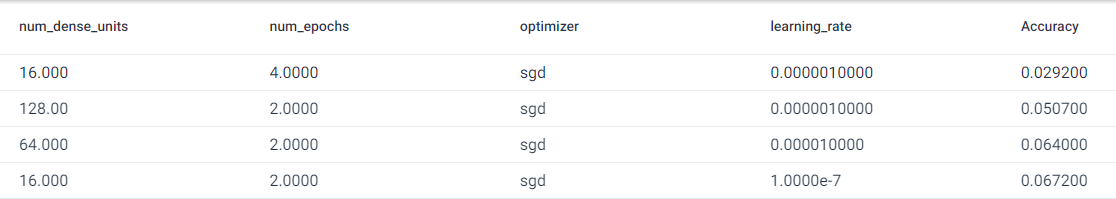
)

On etait surpris de voir que le modele avait une pire performance avec 128 neurones et 6 epoches d'entrainement. Ceci est peut-être causé par le "overfitting". On remarque aussi que le model a une très mauvaise performance quand il est entrainé avec un taux d'apprentissage très bas. D'après une [recherche rapide](https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/), on a appris que un taux d'apprenitissage trop elevé peut causé une  mauvaise covergance, et si elle est trop basse, elle pourrait jaimais converger. C'est peut etre que ce qu'on observe dans la dernière figure. C'est possible que le modele quand $lr = 10^{-7}$, va apprendre très lentement et donc ne sera pas bien entrainé après que 6 epoches. Ca serait interessant d'entrainer le modele avec $lr = 10^{-7}$, mais avec beaucoup plus d'époches. Par contre, ceci pourrait causer un sur-apprentissage et ca pourrait pourrait prendre beacoup de temps pour atteindre une bonne performance. 
 

# Parie 3 : Classification d'objets


L'une des caractéristiques fondamentales de l'apprentissage profond est qu'il est capable de trouver des caractéristiques intéressantes dans les données d'entrainement, sans avoir besoin d'une ingénierie manuelle pour extraire ces caractéristiques, et cela ne peut être réalisé que lorsque de nombreux exemples d'entrainement sont disponibles.

##### Télechargement de dataset_Lab3_partie3

La base de données proposée dans cette partie est formée par 500 images divisées équitabelement sur 10 classes.  

Lire les images à partir des dossiers :

In [1]:
import os
import cv2
import numpy as np

def load_data (data_path,img_shape):
    data_dir_list = os.listdir(data_path)
    img_rows=img_shape[0]
    img_cols=img_shape[1]
    num_channel=img_shape[2]

    labels=[]
    data=[]
    len_list_img=0
    num_class=0
    for dataset in data_dir_list:
        img_list=os.listdir(data_path+'/'+ dataset)    
        for img in img_list:
            input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
            input_img=cv2.resize(input_img,(img_rows,img_cols))
            data.append(input_img)
            labels.append(num_class)
        num_class+=1

    data = np.array(data)
    data = data.astype('float32')
    data /= 255
    labels=np.array(labels)
    print('data shape',data.shape)
    print('labels shape',labels.shape)
    return data, labels

In [2]:
data_path='mini_Caltech101'
img_shape=[224,224,3]
data, labels=load_data (data_path,img_shape)

data shape (500, 224, 224, 3)
labels shape (500,)


Maintenant nous avons bien lu toutes les images et donné à chacune une étiquette. 
Vous pouvez utiliser la fonction ci-desous pour afficher une image en donnant un numéro aléatoire entre 0 et 499(nombre total d'images dans la base de données).

In [3]:
def show_img (data,index):
    if index>=data.shape[0] :
        return print('index doit etre entre 0 et',data.shape[0])
    img=data[index]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)


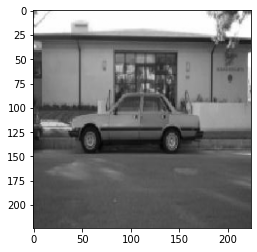

In [6]:
show_img(data,51)

L'étape prochaine est la division de notre base de données en train et test. Cette étape est facile en utilisant la fonction `train_test_split` offerte par `sklearn`.  

In [7]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
num_classes=10
Y = to_categorical(labels, num_classes)
X_train,y_train = shuffle(data,Y, random_state=2)
X_train, X_test, y_train , y_test = train_test_split(X_train,y_train, test_size=0.3, random_state=2)


Définition de notre CNN: 

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
from tensorflow.keras import layers

model = Sequential()
model.add(Convolution2D(16, 3,3,input_shape=img_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 74, 74, 16)        448       
_________________________________________________________________
activation (Activation)      (None, 74, 74, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 37, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 32)        4640      
_________________________________________________________________
activation_1 (Activation)    (None, 12, 12, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 32)          0

In [9]:
# Training
n_epoch=100
hist = model.fit(X_train, y_train, batch_size=15, epochs=n_epoch, verbose=1, validation_data=(X_test, y_test))


Epoch 1/100
24/24 [==============================] - 21s 34ms/step - loss: 2.3177 - accuracy: 0.0971 - val_loss: 2.2959 - val_accuracy: 0.1200
Epoch 2/100
24/24 [==============================] - 0s 11ms/step - loss: 2.2856 - accuracy: 0.1257 - val_loss: 2.2861 - val_accuracy: 0.0933
Epoch 3/100
24/24 [==============================] - 0s 10ms/step - loss: 2.2766 - accuracy: 0.1457 - val_loss: 2.2547 - val_accuracy: 0.1800
Epoch 4/100
24/24 [==============================] - 0s 10ms/step - loss: 2.2290 - accuracy: 0.1629 - val_loss: 2.1724 - val_accuracy: 0.1800
Epoch 5/100
24/24 [==============================] - 0s 10ms/step - loss: 2.1553 - accuracy: 0.1857 - val_loss: 2.1261 - val_accuracy: 0.2333
Epoch 6/100
24/24 [==============================] - 0s 10ms/step - loss: 2.1300 - accuracy: 0.1943 - val_loss: 2.1061 - val_accuracy: 0.1933
Epoch 7/100
24/24 [==============================] - 0s 10ms/step - loss: 2.1107 - accuracy: 0.2086 - val_loss: 2.0985 - val_accuracy: 0.3000
Epoch

On visualise maintenant les résultats obtenus :

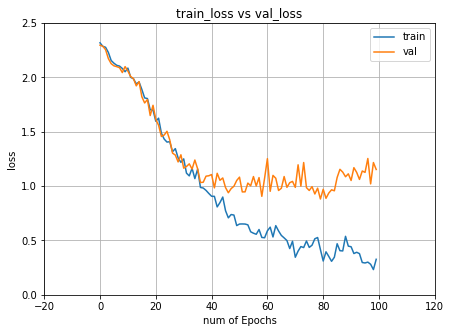

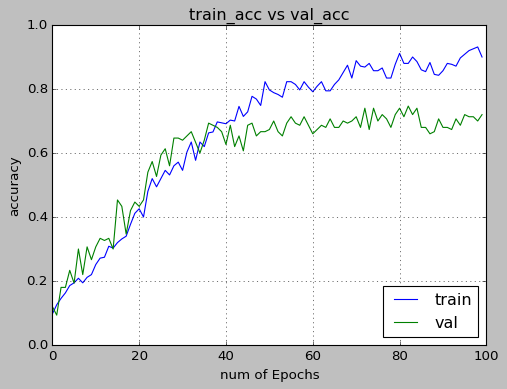

In [10]:
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(n_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
plt.style.use(['classic'])

Évaluation de notre model :

In [23]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)
print(model.predict(test_image))
predict_x=model.predict(test_image) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)
print(y_test[0:1])

5/5 [==============================] - 0s 24ms/step - loss: 1.1526 - accuracy: 0.7200
Test Loss: 1.1526345014572144
Test accuracy: 0.7200000286102295
(1, 224, 224, 3)
[[1.88e-04 6.45e-05 3.42e-03 1.31e-04 9.63e-01 8.32e-06 2.50e-03 1.43e-02
  1.67e-02 4.35e-05]]
[4]
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Maintenant notre modèle est bien entrainé, on peut visualiser les cartes de caractéristiques pour une image de test. Les cartes de caractéristiques sont les réponses des filtres par l'opération de convolution de l'image en entrée.

In [24]:

def get_featuremaps(model, layer_idx, X_batch):
    #from keras import backend as K
    from tensorflow.python.keras import backend as K
    get_activations = K.function([model.input], [model.layers[layer_idx].output])
    activations = get_activations([X_batch])
    return activations

def show_feature_map(layer_num,filter_num,test_image):
    activations = get_featuremaps(model, int(layer_num),test_image)
    feature_maps = activations[0][0]
    fig=plt.figure(figsize=(5,5))
    plt.imshow(feature_maps[:,:,filter_num],cmap='gray')
    
def show_feature_maps(layer_num,test_image):
    activations = get_featuremaps(model, int(layer_num),test_image)
    feature_maps = activations[0][0]    
    num_of_featuremaps=feature_maps.shape[2]
    fig=plt.figure(figsize=(16,16))
    plt.title("featuremaps-layer-{}".format(layer_num))
    subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
    for i in range(int(num_of_featuremaps)):
        ax = fig.add_subplot(subplot_num, subplot_num, i+1)
        ax.imshow(feature_maps[:,:,i],cmap='gray')
        plt.xticks([])
        plt.yticks([])
        plt.tight_layout()
    plt.show()

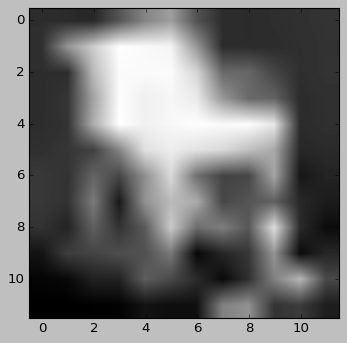

In [13]:
layer_num=3
filter_num=0
show_feature_map(layer_num,filter_num,test_image)

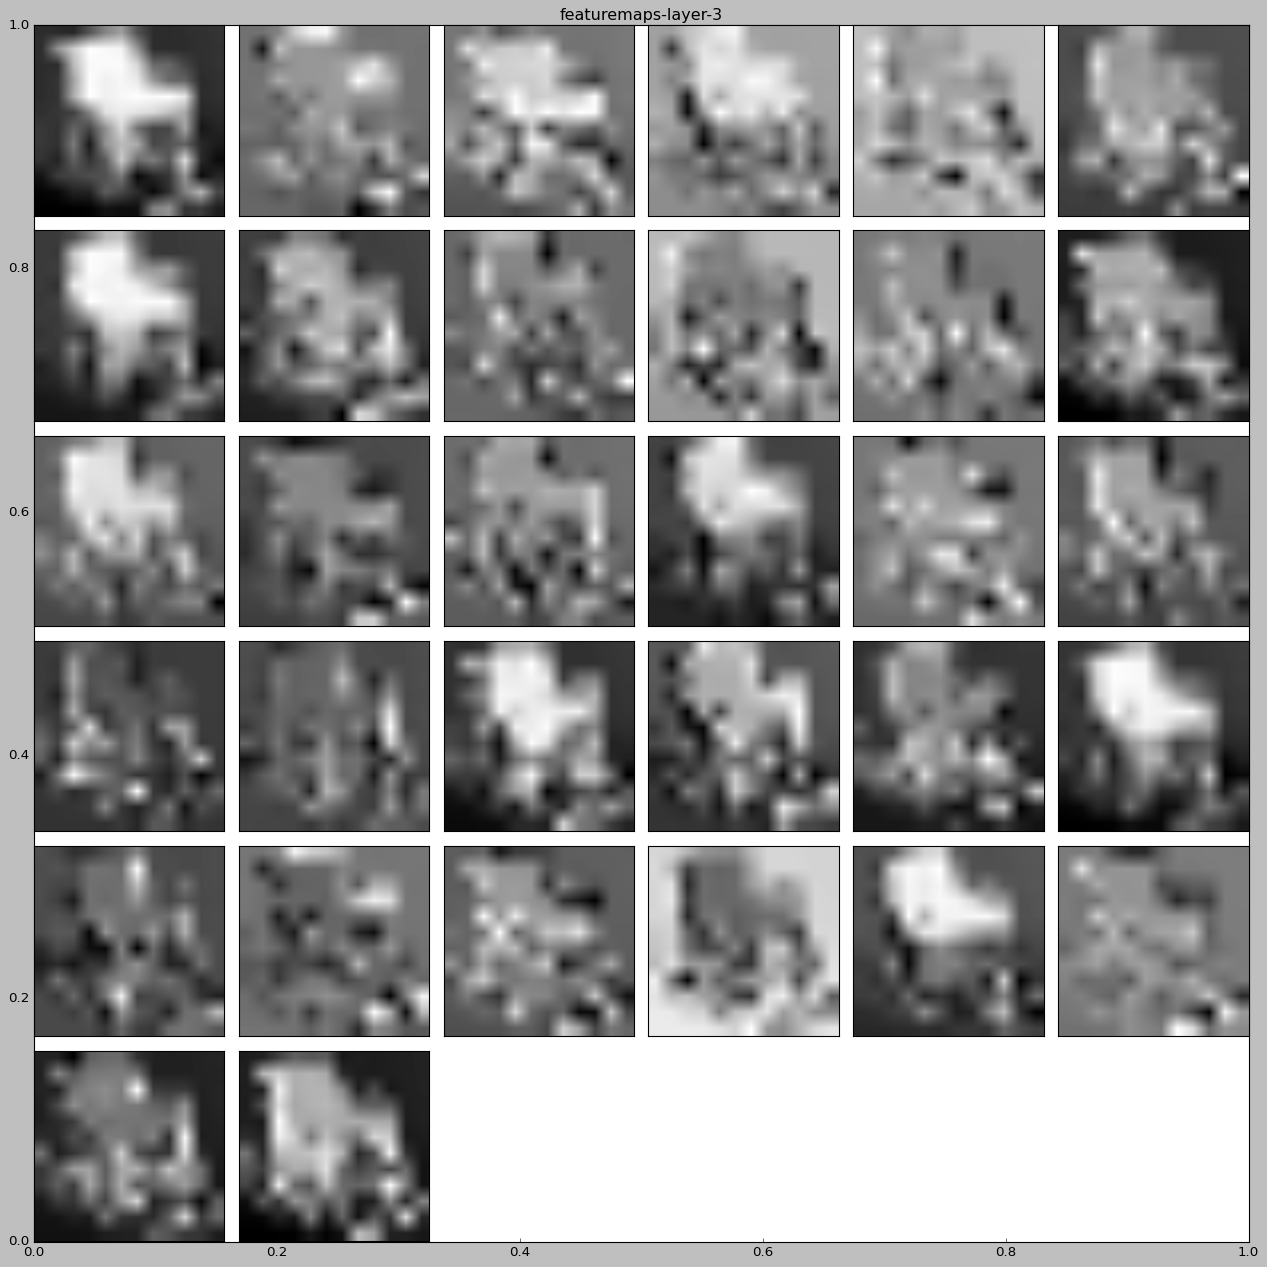

In [14]:
show_feature_maps(layer_num,test_image)

On souhaite mesurer la qualité de notre model de classification. Pour cela, on veut savoir :
* Combien d'images sont faussement estimées pour chaque classe ?
* Combien d'images sont bien classées pour chaque classe ?

La matrice de confusion est le meilleur outil ! 

In [25]:
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [29]:

predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)


[4 8 8 3 5 0 9 8 9 4 5 9 3 9 1 3 2 7 7 1 6 5 8 1 5 7 5 7 5 5 8 6 5 0 8 1 7
 7 5 4 8 1 3 2 8 2 2 2 0 8 6 8 1 5 1 1 7 1 1 0 6 1 5 5 0 8 1 4 4 3 0 5 5 2
 8 3 2 4 7 5 4 6 5 3 1 2 8 6 1 1 8 3 1 5 1 1 7 0 0 9 7 5 4 9 9 2 5 2 8 5 5
 2 2 3 5 5 1 0 3 1 3 3 9 6 7 2 2 2 0 2 0 7 3 2 8 1 0 4 5 2 6 2 0 0 5 2 2 6
 3 0]


Confusion matrix, without normalization


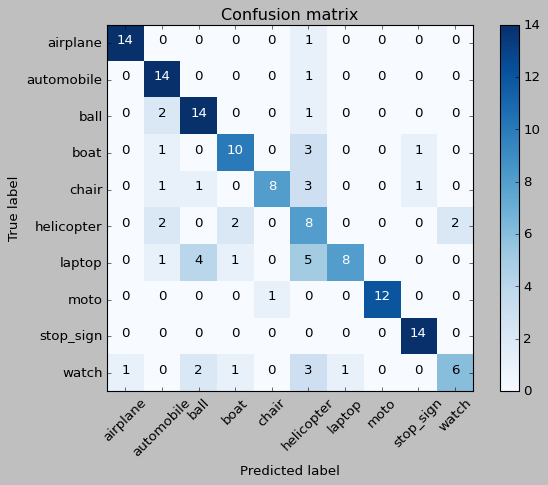

In [41]:
# Compute confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), classes_x))

np.set_printoptions(precision=2)
target_names = os.listdir(data_path)
plot_confusion_matrix(cnf_matrix,normalize=False, classes=target_names,
                      title='Confusion matrix')

# Exercice 3


#### 1- Commenter les résultats obtenus dans cette partie.

In [42]:
print(classification_report(np.argmax(y_test,axis=1), classes_x))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.67      0.93      0.78        15
           2       0.67      0.82      0.74        17
           3       0.71      0.67      0.69        15
           4       0.89      0.57      0.70        14
           5       0.32      0.57      0.41        14
           6       0.89      0.42      0.57        19
           7       1.00      0.92      0.96        13
           8       0.88      1.00      0.93        14
           9       0.75      0.43      0.55        14

    accuracy                           0.72       150
   macro avg       0.77      0.73      0.73       150
weighted avg       0.77      0.72      0.72       150



D'après le rapport du classificateur ci-dessus, l'exactitude moyen du model est de $72\% $. Le voit aussi que le model a la meilleur performance quand il doit reconaitre la moto (7), avec une precision de $1$ et un recall de $0.92$. C'est a dire que dans le test, le model n'a jamais confondu une image "non-moto" pour une moto (precision). Le model a aussi confondu la moto pour une autre classe use seul fois (recall).

On remarque aussi que le model n'est pas très bon a reconnaitre les helicoptaires. Non seuelement ca, mais le model va souvent confondre des images pour un hélicoptaire.

#### 2- À quoi sert les couches de dropout ?

Un des problème courant dans l'apprentissage machine c'est le sur-apprentissage. C'est a dire que le model va très bien reconniatre les images du dataset, mais en revance, il aura appris le bruit des données d'entraienement et donc ne sera pas en mesure de faire la classification sur des données de tests. 

Une solution a ce probleme c'est le **dropout**. Ceci est fait lors de l'entrainement dans la couche d'entrée et chachées. Il s'agit d'éliminer/ignorer des neurones aléatoirement. 

[source](https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/)

#### 3- Modifier les paramètres de l'optimisateur et comparer les résultats. 

Comme pour la Partie 2, nous allons utiliser Tensorboard ainsi de `hparams` pour programatiquement vairier les perparametres pour voir lesquels donnnent la meilleur performance. 

# Évaluation :
### Vous devez fournir un fichier .ipynb avec les réponses aux questions.
Exercice 1 : 25%
Exercice 2 : 25%
Exercice 3 : 50%